<a href="https://colab.research.google.com/github/ealeongomez/Machine-Learning/blob/main/LR_GaussianProcecess_KernelRidge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ealeongomez/Data

Cloning into 'Data'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 35 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [ ]:
cd Data/

/content/Data


In [ ]:
ls

datasets_730942_1268848_sarcasmo.tsv  MK30.csv           time_machine.txt
jena_climate_2009_2016.csv.zip        PuertoBolivar.csv


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

In [ ]:
file = pd.read_csv('MK30.csv')['Values']
dataset = np.array(file)
dataset = (dataset - np.min(dataset))/(np.max(dataset)-np.min(dataset))

dataset.shape

(5000,)

In [ ]:
train_set = dataset[1501:4500]     # Training data
test_set  = dataset[4601:4900]     # Testing data
N_tr      = 500                    # Number of training samples
N_te      = 100                    # Number of testing samples
time_delay = 10                    # Time delay (embedding length)
horizon    = 1                     # Prediction horizon

train_set.shape, test_set.shape

((2999,), (299,))

In [ ]:
X_train = np.zeros([N_tr, time_delay])
for i in range(N_tr):
    X_train[i,:] = train_set[i:i+time_delay+horizon-1]
y_train = train_set[time_delay:time_delay+N_tr+horizon-1][:, np.newaxis]

X_test = np.zeros([N_te, time_delay])
for i in range(N_te):
    X_test[i,:] = test_set[i:i+time_delay+horizon-1]
y_test = test_set[time_delay:time_delay+N_te+horizon-1][:, np.newaxis]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((500, 10), (500, 1), (100, 10), (100, 1))

#**Kernel Ridge**

In [ ]:
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p) for l in np.logspace(-2, 2, 10) for p in np.logspace(0, 2, 10)]
              }

kr = GridSearchCV(KernelRidge(), param_grid=param_grid)
kr.fit(X_train, y_train)

y_kr = kr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.p

#**Gaussian Process Regressor**

In [ ]:
gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) \
    + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel)

gpr.fit(X_train, y_train)

y_gpr, y_std = gpr.predict(X_test, return_std=True)


#**Comparation**

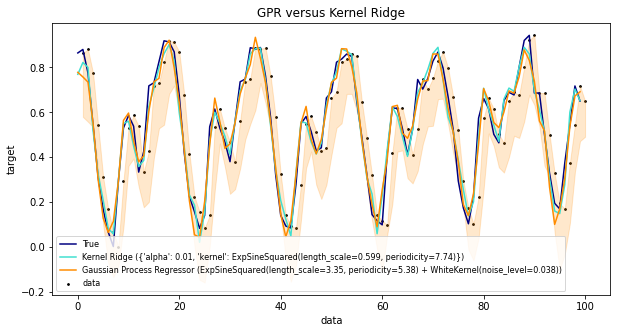

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
lw = 2
plt.scatter(np.arange(1, len(y_test)+1, 1), y_test, c='k', label='data', s=3)
plt.plot(y_test, color='navy', label='True')
plt.plot(y_kr, color='turquoise', label='Kernel Ridge (%s)' % kr.best_params_)
plt.plot(y_gpr, color='darkorange', label='Gaussian Process Regressor (%s)' % gpr.kernel_)
plt.fill_between(np.arange(1,len(y_test)+1,1), np.squeeze(y_test), np.squeeze(y_gpr)-y_std, np.squeeze(y_gpr)+y_std,
                 color='darkorange', alpha=0.2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('GPR versus Kernel Ridge')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()

In [ ]:
a = np.arange(1,len(y_test)+1,1)

In [ ]:
a.shape, y_gpr.shape, y_std.shape, y_test.shape

((100,), (100, 1), (100,), (100, 1))